# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

### Keras Upgrade

In [2]:
!pip install --upgrade keras

In [3]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow' # 기본적으로 tensorflow긴 한데 이렇게 명시를 해줘야 colab에서 에러가 안 뜨는 경우가 있음

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [4]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras # tensorflow의 keras가 아닌 외부의 keras임

### Data Loading

In [5]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
# 정확히는 28, 28, 1이라 제대로 명시를 해줘야하는데, kears가 알아서 보정해주는 것

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2
            "Dress",        # index 3
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6
            "Sneaker",      # index 7
            "Bag",          # index 8
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 3876
이 그림은 Shirt 입니다.


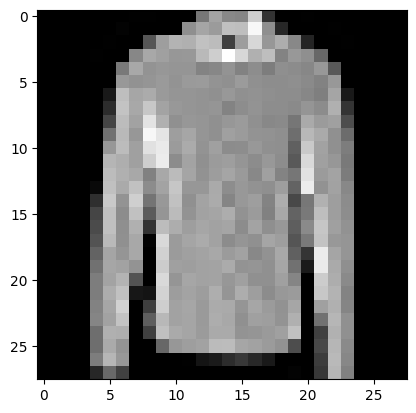

In [8]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'이 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='gray')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [9]:
m = train_x.max()
n = train_x.min()
train_x = (train_x-n) / (m-n)
test_x = (test_x-n) / (m-n)

### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [10]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
print(train_x.shape, test_x.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### Y : One-Hot Encoding

In [11]:
class_n = len(np.unique(train_y))
class_n

10

In [12]:
from keras.utils import to_categorical

train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [13]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [14]:
clear_session()

# 인풋 레이어
model = Sequential()
model.add(Input(shape = (28, 28, 1)))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add(Conv2D(filters = 32,
                 kernel_size=(3, 3),
                 padding='same',
                 strides = (1, 1),
                 activation = 'relu'))
# BatchNormalization
model.add(BatchNormalization())
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add(Conv2D(filters = 32,
                 kernel_size=(3, 3),
                 padding='same',
                 strides = (1, 1),
                 activation = 'relu'))
# BatchNormalization
model.add(BatchNormalization())
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))
# DropOut : 25% 비활성화
model.add(Dropout(0.25))
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add(Conv2D(filters = 64,
                 kernel_size=(3, 3),
                 padding='same',
                 strides = (1, 1),
                 activation = 'relu'))
# BatchNormalization
model.add(BatchNormalization())
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add(Conv2D(filters = 64,
                 kernel_size=(3, 3),
                 padding='same',
                 strides = (1, 1),
                 activation = 'relu'))
# BatchNormalization
model.add(BatchNormalization())
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))
# DropOut : 25% 비활성화
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
# Fully Connected Layer : 노드 512개
model.add(Dense(512, activation = 'relu'))
# BatchNormalization
model.add(BatchNormalization())
# 아웃풋 레이어
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,679,082 (6.41 MB)

 Trainable params: 1,677,674 (6.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.


In [16]:
from keras.callbacks import EarlyStopping

In [17]:
es = EarlyStopping(monitor = 'val_loss',
                    min_delta = 0,
                    patience=5,
                    verbose=1,
                   restore_best_weights=True
                   )

In [18]:
hist = model.fit(train_x, train_y, epochs=100, verbose = 1, validation_split=.2, callbacks=[es], batch_size=128)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8043 - loss: 0.5639 - val_accuracy: 0.4337 - val_loss: 1.7954
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8986 - loss: 0.2767 - val_accuracy: 0.8963 - val_loss: 0.2913
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9113 - loss: 0.2446 - val_accuracy: 0.9102 - val_loss: 0.2406
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9239 - loss: 0.2035 - val_accuracy: 0.9194 - val_loss: 0.2267
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9296 - loss: 0.1873 - val_accuracy: 0.9208 - val_loss: 0.2208
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9378 - loss: 0.1651 - val_accuracy: 0.9118 - val_loss: 0.2480
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9437 - loss: 0.1534 - val_accuracy: 0.9268 - val_loss: 0.2010
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9503 - loss: 0.1379 -

### 이미지 시각화

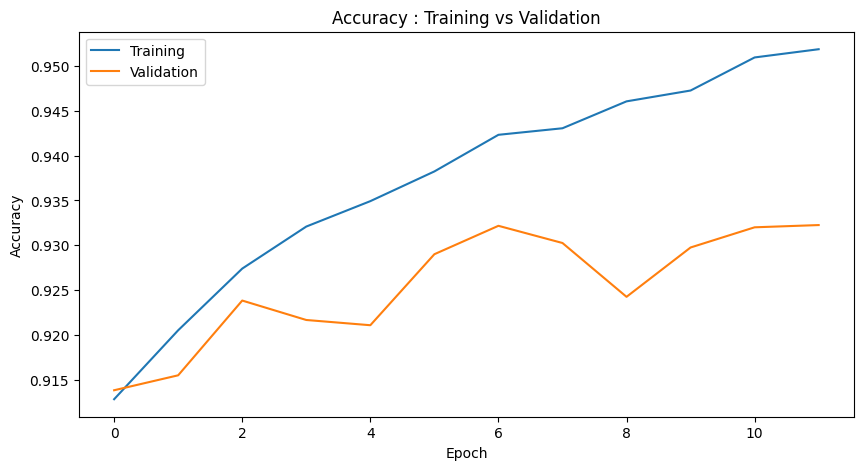

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

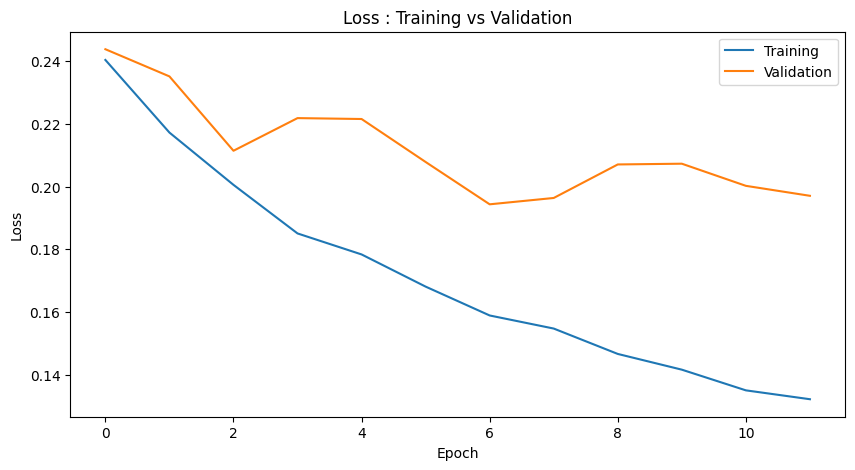

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
y_pred = model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [ ]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 92.65%


id = 4096
다음 그림은 숫자 Coat 입니다.
모델의 예측 : Coat
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 99.  0.  0.  0.  0.  0.]
정답입니다


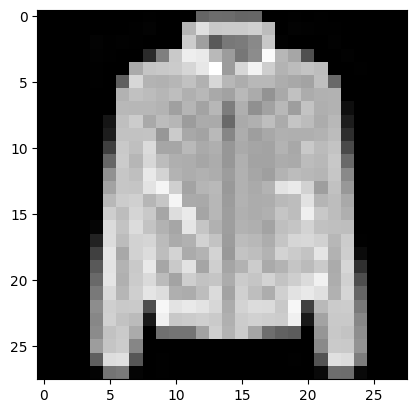

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {labels[single_test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_y_pred[id]]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id], cmap='gray')
plt.show()

In [19]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {labels[single_test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_y_pred[id]]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id], cmap='gray')
plt.show()

NameError: name 'single_test_y' is not defined